In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [76]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils._bunch.Bunch

In [77]:
  
# # IMPORT THE IRIS DATA FROM THE 
# # SKLEARN MODULE
# from sklearn.datasets import load_iris
  
# # LOAD THE IRIS DATASET BY CALLING
# # THE FUNCTION
# iris_data = load_iris()
 
  
# # PLACE THE IRIS DATA IN A PANDAS
# # DATAFRAME
# attr = pd.DataFrame(data=iris_data.data, 
#                   columns=iris_data.feature_names)
# target =pd.DataFrame({'Species': iris_data.target})

# # DISPLAY FIRST 5 RECORDS OF THE 
# # DATAFRAME
# target.head()
# attr.head(10)

In [78]:
# Loading iris
df = pd.read_csv('./data/UCI_heart.csv')
# df.head()
#print(df.describe())
# #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type
df.head(10)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,Heart_problem,Age_Quantile
0,63,1,145,233,1,2,150,0,0,Q4
1,67,1,160,286,0,2,108,1,1,Q4
2,67,1,120,229,0,2,129,1,1,Q4
3,37,1,130,250,0,0,187,0,0,Q1
4,41,0,130,204,0,2,172,0,0,Q1
5,56,1,120,236,0,0,178,0,0,Q2
6,62,0,140,268,0,2,160,0,1,Q4
7,57,0,120,354,0,0,163,1,0,Q3
8,63,1,130,254,0,2,147,0,1,Q4
9,53,1,140,203,1,2,155,1,1,Q2


In [79]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df = pd.get_dummies(df, columns=["Age_Quantile"])



# # Splitting the dataset
attr = df[["sex", "fbs", "restecg", "exang", "Age_Quantile_Q1","Age_Quantile_Q2","Age_Quantile_Q3", "Age_Quantile_Q4"]]  # features
target = df['Heart_problem']  # target variable

# # attr.head()
# target.head()


Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []


In [80]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,sex,fbs,restecg,exang,Age_Quantile_Q1,Age_Quantile_Q2,Age_Quantile_Q3,Age_Quantile_Q4
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [81]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 3, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

245    1
162    0
10     0
161    1
73     1
Name: Heart_problem, dtype: int64

In [82]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [2]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 2: 0.6710526315789473



In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))


Confusion Matrix
[[34  6]
 [19 17]]

Accuracy score
0.6710526315789473

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        40
           1       0.74      0.47      0.58        36

    accuracy                           0.67        76
   macro avg       0.69      0.66      0.65        76
weighted avg       0.69      0.67      0.66        76



In [84]:
# target_pred.head()
attr_test['target_pred']=target_pred
# print(target_test)
attr_test['target_actual']= target_test
attr_test.head()


,sex,fbs,restecg,exang,Age_Quantile_Q1,Age_Quantile_Q2,Age_Quantile_Q3,Age_Quantile_Q4,target_pred,target_actual
245,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
162,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
161,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1
73,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1


[Text(0, 0.5, 'Heart Problem'), Text(0, 1.5, 'No Heart Problem')]

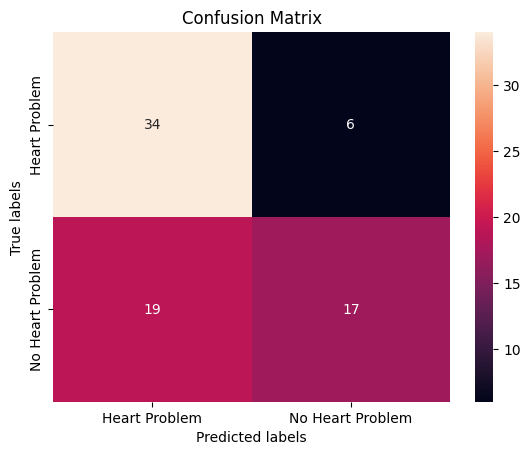

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Heart Problem", "No Heart Problem"])
ax.yaxis.set_ticklabels(["Heart Problem", "No Heart Problem"])